In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import 

In [6]:
input_dir = 'C:/dev/quant_research/data/'
file_etfs = input_dir + 'ETFs_RP.csv'

In [66]:
cols = ["dts","AGG","GLD","SPY"]
df = pd.read_csv(file_etfs,usecols= cols, index_col='dts')
df.set_index(pd.to_datetime(df.index,format="%Y%m%d"),inplace=True)
#df.head(3)
df = df.dropna(0)
df_ret = df.pct_change()

In [69]:
np.round(df_ret.corr(),2)

,AGG,GLD,SPY
AGG,1.00,0.08,-0.10
GLD,0.08,1.00,0.07
SPY,-0.10,0.07,1.00


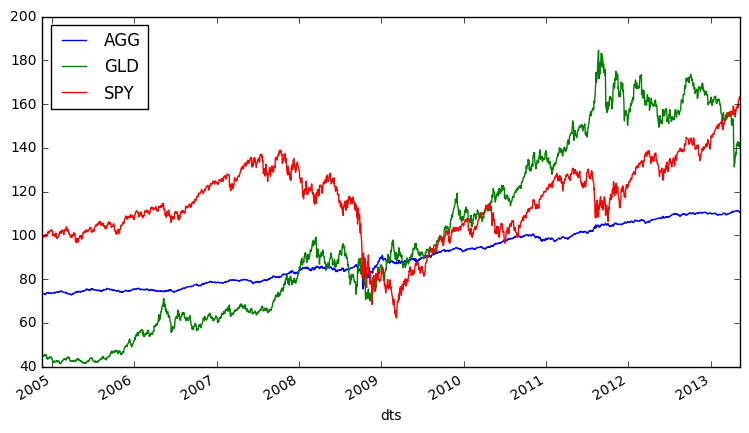

In [70]:
df.plot(figsize=(9,5))

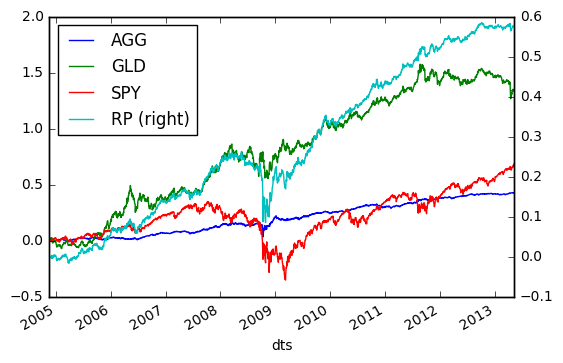

In [71]:

df_std = df_ret.ewm(halflife =30).std()*np.sqrt(252)
#1/df_std/((1/df_std).sum(axis=1))
wts = (1/df_std).apply(lambda x: x/((1/df_std).sum(axis=1)))
df_ret_rp = (df_ret * wts.shift(1)).sum(axis=1)


ax = df_ret.cumsum().plot()
df_ret_rp.cumsum().to_frame("RP").plot(ax =ax, secondary_y= True)

In [72]:
df_ret_rp.mean()/df_ret_rp.std()*np.sqrt(252)


1.0726263471747477

In [73]:
df_ret.mean()/df_ret.std()*np.sqrt(252)

AGG    0.908368
GLD    0.761536
SPY    0.375226
dtype: float64

In [74]:
df_ret.mean(axis=1).mean()/df_ret.std()*np.sqrt(252)

,AGG,GLD,SPY
dts,,,
2004-11-18,NaN,NaN,NaN
2004-11-19,-0.002044,0.009013,-0.011117
2004-11-22,0.001560,0.003796,0.004770
2004-11-23,-0.000584,-0.004449,0.001525
2004-11-24,0.000975,0.006704,0.002369
2004-11-26,-0.002907,0.005327,-0.000759
2004-11-29,-0.002747,0.002429,-0.004562
2004-11-30,0.000489,-0.006167,0.000679
2004-12-01,-0.003751,0.005762,0.011367
